In [30]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
import regex as re
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/figaro-code"
exp_names = ["mkl"]
exp_paths = {"figaro_thin_diag": "comparisons/accuracy/figaro/thin_diag", "mkl": "comparisons/accuracy/python/mkl"}
figaro_impls = ["figaro_thin_diag", "figaro_lapack"]
figaro_impls_full_name = {"figaro_thin_diag": "C++-figaro_thin_diag", "figaro_lapack": "C++-figaro_lapack"}
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]
join_orders = {"DBRetailer": "LocationRoot48", "DBFavorita": "StoresRoot48", "DBYelp": "BusinessRoot48"}
start_per = 10
end_per = 100
per_inc = 10

num_measurement = 5

txt_name = "error.txt"
numeric_const_pattern = r"Relative error is: ([+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?)"
rx = re.compile(numeric_const_pattern)

df_measurement_exps = {}
for exp_name in exp_names: 
    exp_path = exp_paths[exp_name]
    accur_path = os.path.join(path_src, exp_path)
    
    for figaro_impl in figaro_impls:
        df_measurement = pd.DataFrame(columns=db_names)
        figaro_impl_full_name = figaro_impls_full_name.get(figaro_impl)
        for db_name in db_names:
            join_order = join_orders[db_name]

            for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)): 
                db_name_per = "{}{}".format(db_name, percent)
                path_txt = os.path.join(accur_path, db_name_per, join_order, figaro_impl_full_name + txt_name)
                with open(path_txt, 'r') as file_accur:
                    for line in file_accur:
                        match = rx.search(line)
                        if match:
                            relative_error = float(match.group(1))

                df_measurement.at[percent, db_name] = relative_error
                
            #out_workbook.save(gather_times_path)
            print(df_measurement)
        
        df_measurement_exps[(exp_name, figaro_impl)] = df_measurement





      DBRetailer DBFavorita DBYelp
10   3.49483e-14        NaN    NaN
20   3.94263e-14        NaN    NaN
30     4.567e-14        NaN    NaN
40   8.01548e-14        NaN    NaN
50   1.63247e-13        NaN    NaN
60   2.52381e-13        NaN    NaN
70   3.85225e-14        NaN    NaN
80    9.5565e-14        NaN    NaN
90   4.54061e-13        NaN    NaN
100  3.76289e-13        NaN    NaN
      DBRetailer   DBFavorita DBYelp
10   3.49483e-14   8.4078e-15    NaN
20   3.94263e-14  7.26383e-13    NaN
30     4.567e-14  1.25991e-12    NaN
40   8.01548e-14  1.85873e-12    NaN
50   1.63247e-13  8.55036e-13    NaN
60   2.52381e-13  8.36694e-13    NaN
70   3.85225e-14  1.08312e-12    NaN
80    9.5565e-14  7.33186e-12    NaN
90   4.54061e-13  1.37303e-12    NaN
100  3.76289e-13  2.51848e-12    NaN
      DBRetailer   DBFavorita       DBYelp
10   3.49483e-14   8.4078e-15  1.88454e-14
20   3.94263e-14  7.26383e-13  7.41508e-14
30     4.567e-14  1.25991e-12  1.54054e-13
40   8.01548e-14  1.85873e-12   4.90

{('mkl', 'figaro_thin_diag'):       DBRetailer   DBFavorita       DBYelp
10   3.49483e-14   8.4078e-15  1.88454e-14
20   3.94263e-14  7.26383e-13  7.41508e-14
30     4.567e-14  1.25991e-12  1.54054e-13
40   8.01548e-14  1.85873e-12   4.9018e-14
50   1.63247e-13  8.55036e-13   1.9227e-13
60   2.52381e-13  8.36694e-13  1.07734e-13
70   3.85225e-14  1.08312e-12  2.37419e-13
80    9.5565e-14  7.33186e-12  1.37458e-13
90   4.54061e-13  1.37303e-12  1.31303e-13
100  3.76289e-13  2.51848e-12   5.2454e-13, ('mkl', 'figaro_lapack'):       DBRetailer   DBFavorita       DBYelp
10   3.65819e-14  5.60196e-15  1.88579e-14
20   3.91251e-14  7.25244e-13  7.40605e-14
30   4.56848e-14  1.25149e-12  1.53942e-13
40   7.96117e-14   1.8467e-12  4.90276e-14
50   1.64021e-13  7.67673e-13  1.91909e-13
60   2.51939e-13  6.16521e-13  1.07539e-13
70   3.82433e-14  7.54332e-13  2.37113e-13
80   9.59213e-14  7.26122e-12  1.37457e-13
90   4.54468e-13  4.79985e-13  1.31572e-13
100  3.75707e-13  1.96139e-12  5.24533e-

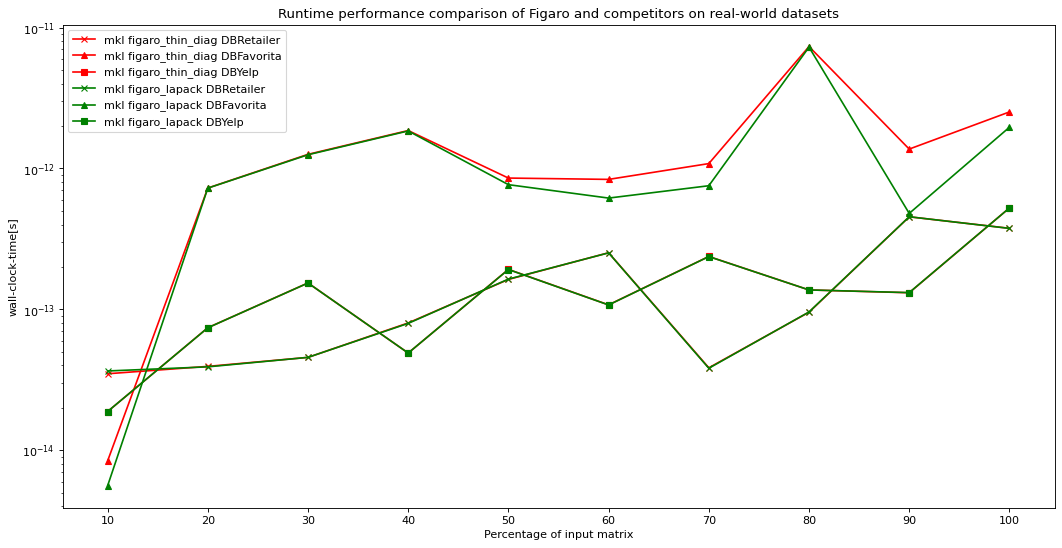

In [31]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of input matrix")
plt.ylabel("wall-clock-time[s]")

plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

plt.yscale('log', base=10)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_marker =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
exp_colour = {"figaro_thin_diag": "r", "figaro_lapack": "g", "mkl": "b"}

print(df_measurement_exps)
for exp_name in exp_names:
    print(exp_name)
    for figaro_impl in figaro_impls:
        df_measurement = df_measurement_exps[(exp_name, figaro_impl)]
        for db_name in df_measurement:
            print(df_measurement[db_name])
            plt.plot(df_measurement[db_name], "-" + exp_colour[figaro_impl] + db_marker[db_name], label="{} {} {}".format(exp_name, figaro_impl, db_name))
plt.legend(loc="upper left")

plt.show()